# Plot Data of Environmental Network within ROMY

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

from pandas import DataFrame
from obspy import UTCDateTime, Stream

In [2]:
from functions.load_lxx import __load_lxx
from functions.get_lxx_intervals import __get_lxx_intervals
from functions.read_sds import __read_sds
from functions.load_furt_stream import __load_furt_stream
from functions.read_wromy_data import __read_wromy_data
from functions.find_labels import __find_lables


In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'teide':
    root_path = '/home/sysopromy/'
    data_path = '/freenas-ffb-01/'
    archive_path = '/freenas-ffb-01/'
    bay_path = '/bay200/'
    lamont_path = '/lamont/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
def __find_min_max_stream(_st, _cha):

    from numpy import nanmin, nanmax, nanpercentile

    arr = []
    for tr in _st:
        if tr.stats.channel == _cha:
            arr.append(tr.data)

    return nanpercentile(arr, 0.05), nanpercentile(arr, 99.95)

In [6]:
def __find_min_max(_df, _cha):

    from numpy import nanmin, nanmax, nanpercentile, array, append

    arr = array([])
    for _k in _df.keys():
        arr = append(arr, array(_df[_k][_cha]))

    return nanpercentile(arr, 0.05), nanpercentile(arr, 99.95)

In [7]:
config = {}

# define path to data
config['path_to_sds'] = archive_path+"romy_archive/"

# path to figure output
config['path_to_figs'] = archive_path+f"romy_html_monitor/figures/"

# specify length of time interval to show
config['time_interval'] = 14 # days

# define time interval
config['tend'] = UTCDateTime().now()
config['tbeg'] = config['tend'] - config['time_interval'] * 86400

# specify wromy stations to use
config['wromy_stations'] = [1, 4, 5, 6, 7, 8, 9]

# specify promy stations to use
config['promy_stations'] = [1, 4, 5, 7, 9]

# specify colors for stations
config['colors'] = {  1:'darkgreen',
                      3:'lightgreen',
                      4:'purple',
                      5:'darkred',
                      6:'darkblue',
                      7:'darkorange',
                      8:'darkcyan',
                      9:'cyan',
                     }

### Load Maintenance Log

In [8]:
try:
    # load log file
    lxx =__load_lxx(config['tbeg'], config['tend'], archive_path)

    # get intervals of maintenance work as utc times
    lxx_t1, lxx_t2 = __get_lxx_intervals(lxx.datetime)

except Exception as e:
    print(e)
    print(f" -> failed to load maintenance log")


### Load WROMY data

In [9]:
# ws = Stream()

# for _s in config['wromy_stations']:
#     try:
#         ws += __read_sds(archive_path+"temp_archive/", f"BW.WROMY.0{_s}.L*I", config['tbeg'], config['tend'])
#     except:
#         print(f" -> failed to load WS: {_s}")

# ws = ws.merge();

# ws

In [10]:
ws = {}

for _s in config['wromy_stations']:
    try:
        _ws = __read_wromy_data(config['tbeg'], config['tend'], f"WS{_s}", archive_path+"romy_archive/")

        _ws_times_utc = [UTCDateTime(f"{d}T{str(t).rjust(6, '0')}") for d, t in zip(_ws['Date'], _ws['Time (UTC)'])]

        ws[_s] = {"time": np.array(_ws_times_utc),
                  "LKI": np.array(_ws['Temperature (°C)']),
                  "LDI": np.array(_ws['Pressure (hPa)']),
                  "LII": np.array(_ws['rel. Humidity (%)']),
                 }
    except Exception as e:
        print(e)
        print(f" -> failed to load WS: {_s}")


### Load PROMY data

In [11]:
ps = Stream()

for _s in config['promy_stations']:
    try:
        ps += __read_sds(archive_path+"temp_archive/", f"BW.PROMY.0{_s}.L*I", config['tbeg'], config['tend'])
    except Exception as e:
        print(e)
        print(f" -> failed to load PS: {_s}")

ps3 = ps.merge();

ps

10 Trace(s) in Stream:
BW.PROMY.01.LDI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.01.LKI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.04.LDI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.04.LKI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.05.LDI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.05.LKI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.07.LDI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.07.LKI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.09.LDI | 2025-03-25T12:14:38.000000Z - 2025-04-14T23:59:59.000000Z | 1.0 Hz, 1770322 samples
BW.PROMY.09.LKI | 2025-03-25T12:14:38.000000Z - 2025-04-14T

### Load FURT data

In [12]:
try:
    furt = __load_furt_stream(config['tbeg'], config['tend'], path_to_archive=bay_path+'gif_online/FURT/WETTER/')
except Exception as e:
    print(e)
    print(f" -> failed to load FURT data")


 -> loading of FURT.WSX.D.260325.0000 failed!
Specified end: 2025-04-15T12:14:37.195707Z 
Trace end:     2025-04-15T12:14:38.000000Z


### Load Radon Data

In [13]:
try:
    rdn = __read_wromy_data(config['tbeg'], config['tend'], "RDN", archive_path+"romy_archive/")

    # add utc times
    rdn['times_utc'] = [UTCDateTime(f"{d}T{str(t).rjust(6, '0')}") for d, t in zip(rdn['Date'], rdn['Time (UTC)'])]

except Exception as e:
    print(e)
    print(f" -> failed to load radon data")


### Plotting

In [14]:
def __makeplot():

    Nrow, Ncol = 4, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(8, 8), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    axes0 = ax[0].twinx()
    axes0.plot(furt.select(channel="LAT")[0].times(reftime=config['tbeg']),
               furt.select(channel="LAT")[0].data, color="grey", label="FURT",
               zorder=1, alpha=0.6, lw=1
              )
    axes0.tick_params(axis='y', colors="grey")
    axes0.set_ylabel("FURT (°C)", color="grey")

    ax[1].plot(furt.select(channel="LAP")[0].times(reftime=config['tbeg']),
               furt.select(channel="LAP")[0].data, color="grey", label="FURT"
              )

    axes2 = ax[2].twinx()
    axes2.plot(furt.select(channel="LAH")[0].times(reftime=config['tbeg']),
               furt.select(channel="LAH")[0].data, color="grey", label="FURT",
               zorder=1, alpha=0.6, lw=1
              )
    axes2.tick_params(axis='y', colors="grey")
    axes2.set_ylabel("FURT (%)", color="grey")

    for _s in config['wromy_stations']:

        # only plot temperature of PROMY if available
        if _s not in config['promy_stations']:
            ax[0].plot(ws[_s]['time'] - config['tbeg'], ws[_s]['LKI'],
                       color=config['colors'][_s], lw=1, label=f"WS{_s}")

        ax[1].plot(ws[_s]['time'] - config['tbeg'], ws[_s]['LDI'],
                   color=config['colors'][_s], lw=1, label=f"WS{_s}")

        ax[2].plot(ws[_s]['time'] - config['tbeg'], ws[_s]['LII'],
                   color=config['colors'][_s], lw=1, label=f"WS{_s}")

    for _s in config['promy_stations']:

        # extract station trace for temperature
        sta = ps.select(location=f"0{_s}", channel="LKI")[0]
        ax[0].plot(sta.times(reftime=config['tbeg']), sta.data,
                   color=config['colors'][_s], lw=1, label=f"PS{_s}")

    ax[3].plot(rdn.times_utc - config['tbeg'], rdn['Radon ST avg (Bq/m3)'], color="k", label=f"RDN")
    ax[3].axhspan(0, 100, color='green', alpha=0.2, zorder=0)
    ax[3].axhspan(100, 150, color='yellow', alpha=0.2, zorder=0)
    ax[3].axhspan(150, np.nanmax(rdn['Radon ST avg (Bq/m3)'])+100, color='red', alpha=0.2, zorder=0)
    ax[3].set_ylim(0, np.nanmax(rdn['Radon ST avg (Bq/m3)'])+100)

    Tmin, Tmax = __find_min_max(ws, "LKI")
    ax[0].set_ylim(Tmin-1, Tmax+1)

    Pmin, Pmax = __find_min_max(ws, "LDI")
    ax[1].set_ylim(Pmin-2, Pmax+2)

    Hmin, Hmax = __find_min_max(ws, "LII")
    ax[2].set_ylim(Hmin-5, Hmax+5)

    ax[0].set_ylabel("Temperature (°C)")
    ax[1].set_ylabel("Pressure (hPa)")
    ax[2].set_ylabel("Humidity (%)")
    ax[3].set_ylabel(r"Radon (Bq/m$^3$)")

    for _n in range(Nrow):
        # ax[_n].grid(ls=":", zorder=0)
        ax[_n].set_xlim(left=0)

    ax[1].legend(ncol=4, bbox_to_anchor=(0.5, 2.5), loc="center", fontsize=font-2)

    # add maintenance
    for lx1, lx2 in zip(lxx_t1, lxx_t2):
        lx1_sec = lx1-config['tbeg']
        lx2_sec = lx2-config['tbeg']
        for i in range(3):
            ax[i].fill_betweenx([-1000, 1000], lx1_sec, lx2_sec, color="yellow", alpha=0.5)

    # add dates to x-axis
    # tdiff = config['tend'] - config['tbeg']
    # time_step = config['time_interval'] / 5 * 86400
    # tcks = [tdiff - x for x in np.arange(0, 5*time_step, time_step)]
    # tcklbls = [f"{(config['tbeg']+t).date} \n {str((config['tbeg']+t).time).split('.')[0]}" for t in tcks]
    # ax[Nrow-1].set_xticks(tcks)
    # ax[Nrow-1].set_xticklabels(tcklbls)

    df0 = DataFrame()
    df0['times_utc'] = furt[0].times("utcdatetime")

    # add dates for x-axis
    lbl_times, lbl_index = __find_lables(df0, "times_utc", config['tbeg'], config['tend'], nth=4)
    tcklbls = [str(_lbl).split('.')[0].replace('T', '\n') for _lbl in lbl_times]
    ax[Nrow-1].set_xticks([_lt - config['tbeg'] for _lt in lbl_times])
    ax[Nrow-1].set_xticklabels(tcklbls)

    # plt.show();
    return fig

 -> failed for 2025-03-25 00:00:00
index 0 is out of bounds for axis 0 with size 0


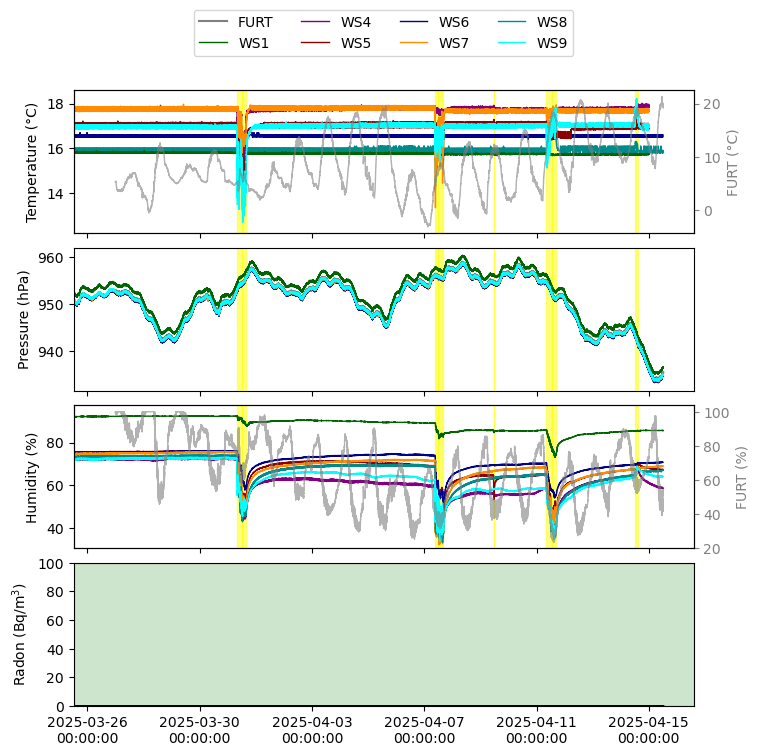

In [15]:
fig = __makeplot();

In [16]:
fig.savefig(config['path_to_figs']+f"html_wromy.png", format="png", dpi=150, bbox_inches='tight')

In [17]:
del fig